## Exploratory Data Analysis

- Basic Emissions
- Weekly/Monthly plot
- Seasonality w/ inset
- Test vs Val

OPT:
- modeled prediction accuracy (gen vs 2020/2021)
- Seasonal trend vs 2020/2021 seasonal

In [1]:
#Basics
import numpy as np
import pandas as pd

#Viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='colorblind')
plt.rc('font',size=14)

#tsa
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm

#utils
import utils

### Acquire

In [2]:
#acquire
df = utils.get_co2_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 697 entries, 1964-05-15 to 2022-05-15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      697 non-null    object 
 1   mn      697 non-null    object 
 2   co2     697 non-null    float64
dtypes: float64(1), object(2)
memory usage: 21.8+ KB


### Splitting

I'm planning to do a cross-validation with a rolling 30 years. So for my first analysis, I still want to only use 30 years, so for this I'll pull that last 30, then do a split

In [10]:
print(f'{df.index.min()}\n{df.index.max()}')

1964-05-15 00:00:00
2022-05-15 00:00:00


In [14]:
#grab last index value
end = df.tail(1).index
#get index from 30 years prior

#use
# yr30 = df
# tr = 

In [16]:
print(end)

DatetimeIndex(['2022-05-15'], dtype='datetime64[ns]', name='date', freq=None)


<AxesSubplot:>

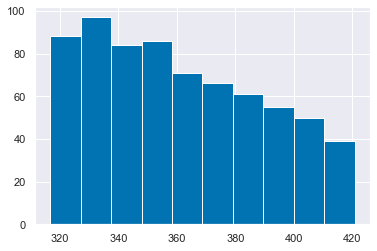

In [4]:
#distribution of values
df.co2.hist()

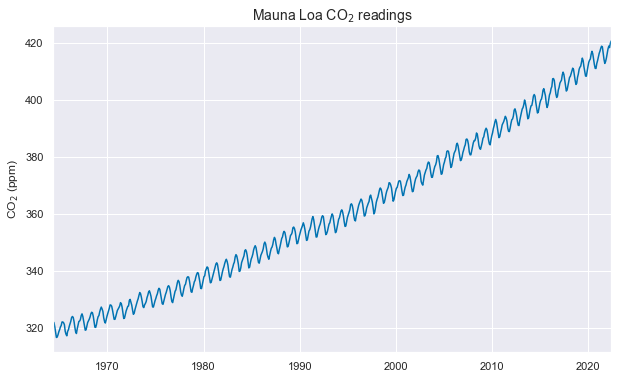

In [5]:
#time series plot
plt.figure(figsize=(10,6))
plt.plot(df.co2);
plt.title("Mauna Loa CO$_2$ readings",size=14);
plt.ylabel("CO$_2$ (ppm)");
plt.autoscale(enable=True, axis='x', tight=True); #makes x axis tight

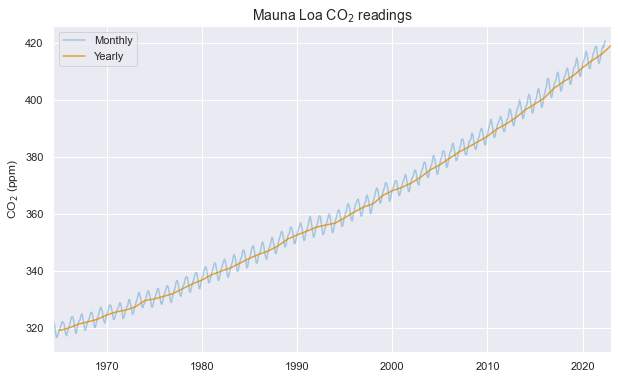

In [6]:
#Monthly/yearly graph
plt.figure(figsize=(10,6))
plt.plot(df.co2, alpha=.3, label='Monthly');
yrdf = df.resample('Y').mean()
plt.plot(yrdf, alpha=.8, label='Yearly')
plt.title("Mauna Loa CO$_2$ readings",size=14);
plt.ylabel("CO$_2$ (ppm)");
plt.legend()
plt.autoscale(enable=True, axis='x', tight=True); #makes x axis tight

### Return to the below cell to code and work on it once I learn more about mpl_toolkit

In [7]:
# #Now repeat, but show seasonal inset
# fig, ax1 = plt.subplots()
# #BIG PLOT
# ax1.plot(df);
# ax1.set_title("Mauna Loa $CO_2$ readings",size=14);
# ax1.set_ylabel("$CO_2$ (ppm)");
# # ax1.set(title="Mauna Loa $CO_2$ readings",ylabel="$CO_2$ (ppm)")
# ax1.autoscale(enable=True, axis='x', tight=True); #makes x axis tight
# #INSET PLOT
# ax

### Seasonality

- 

## Modeling

**NOTES on convo with Adam/Ryan - for modeling:** 20% more than time period

- percent accuracy at end of val, percent accuracy at end of test >> inform
  - see how far off from test the train only predictions would be
- Prophet

CrossValidation: can you build multiple models off of different training
- how well does one model perform over a long time period?
  - Greykite
- validation length should stay the same
- can either grow the train or shift it
